<a href="https://colab.research.google.com/github/MrParzival01/Animal-Classification-Using-Deep-CNN/blob/main/Deep_CNN_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Dataset - kaggle datasets download -d salader/dogs-vs-cats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:49<00:00, 22.8MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.2MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=50,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=50,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=20,validation_data=validation_ds)

Epoch 1/20
400/400 [==============================] - 88s 191ms/step - loss: 1.3031 - accuracy: 0.6054 - val_loss: 0.6374 - val_accuracy: 0.6476
Epoch 2/20
400/400 [==============================] - 66s 164ms/step - loss: 0.5597 - accuracy: 0.7155 - val_loss: 0.4976 - val_accuracy: 0.7566
Epoch 3/20
400/400 [==============================] - 66s 164ms/step - loss: 0.4812 - accuracy: 0.7713 - val_loss: 0.4847 - val_accuracy: 0.7666
Epoch 4/20
400/400 [==============================] - 64s 159ms/step - loss: 0.4238 - accuracy: 0.8087 - val_loss: 0.4843 - val_accuracy: 0.7768
Epoch 5/20
400/400 [==============================] - 81s 200ms/step - loss: 0.3612 - accuracy: 0.8414 - val_loss: 0.4553 - val_accuracy: 0.7962
Epoch 6/20
400/400 [==============================] - 65s 160ms/step - loss: 0.2976 - accuracy: 0.8728 - val_loss: 0.4826 - val_accuracy: 0.7808
Epoch 7/20
400/400 [==============================] - 66s 164ms/step - loss: 0.2235 - accuracy: 0.9103 - val_loss: 0.7138 - val_ac

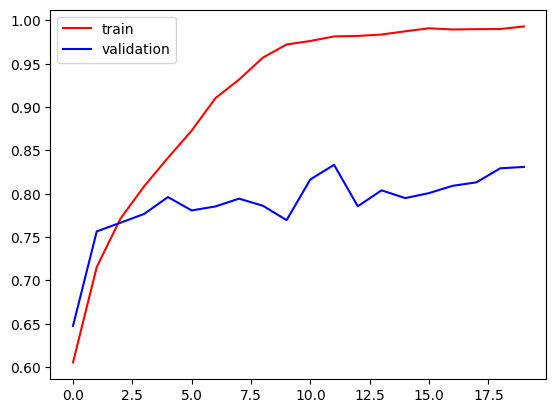

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

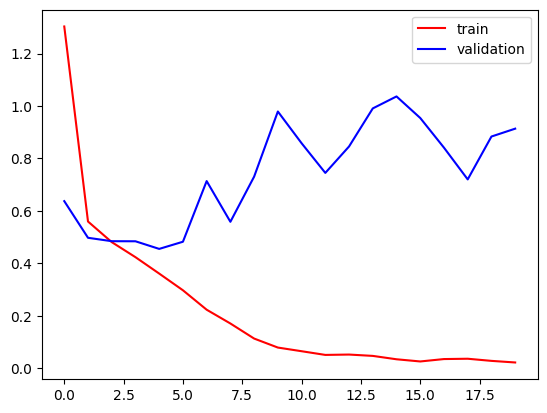

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
model.save_weights('./checkpoints/my_checkpoint')


In [ ]:
model.load_weights('./checkpoints/my_checkpoint')

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/pexels-pixabay-220938.jpg')

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

In [ ]:
import cv2


In [ ]:
test_img = cv2.imread('/content/train/cats/cat.1001.jpg')


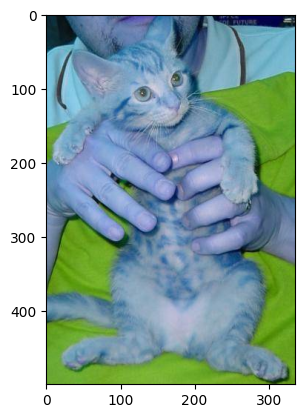

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[0.]], dtype=float32)